<a href="https://colab.research.google.com/github/Adazz10/Projetinho-1/blob/main/Bandits.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import numpy as np

In [2]:
class Bandit():

    def __init__(self, k_arms=10):
        # gera k números aleatórios uniformemente distribuídos entre -3 e 3
        self.bandits_expectations = np.random.uniform(-3, 3, k_arms)
    
    def gamble(self, action):
        """ação(int) -> recompensa(int)
        Recebe uma ação representando a alavanca que será acionada, 
        que devolve uma recompensa baseada em uma distribuição normal 
        de média definida no init e desvio padrão 1.
        """
        return np.random.normal(self.bandits_expectations[action], 1)
  
# np.random.normal vai pegar/devolver valores conforme uma distribuição normal, ou seja, valores mais próximos da média aparecerão mais vezes.
# np.random.uniform vai pegar/devolver valores conforme uma distribuição equiprovável, ou seja, qualquer valor entres os limites pode
# aparecer com a mesma probabilidade.

In [3]:
np.random.seed(31415) # Definindo os n
env = Bandit(10) # inicializa um bandit de 10 alavancas

In [5]:
print(env.bandits_expectations)

[ 0.87491164  1.05104502  2.82422392  2.30882619  2.45439506  1.9415578
 -0.07974167  0.72596148  0.86107478 -0.5977826 ]


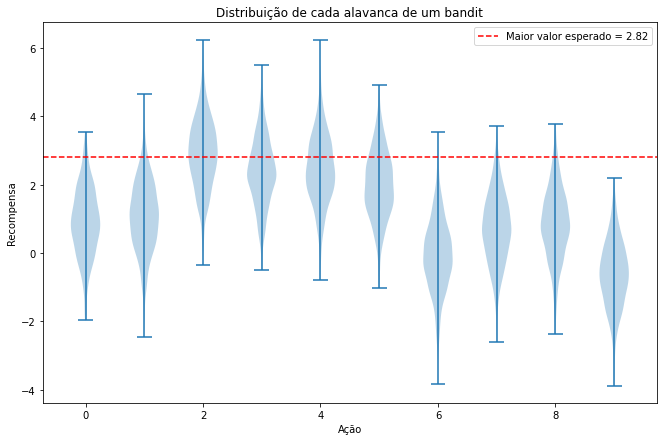

In [9]:
import matplotlib.pyplot as plt

# as demais partes randoms do código não tem seed? É de fato
# verdadeiramente aleatório

samples = [[env.gamble(0) for i in range(1000)],
           [env.gamble(1) for i in range(1000)],
           [env.gamble(2) for i in range(1000)],
           [env.gamble(3) for i in range(1000)],
           [env.gamble(4) for i in range(1000)],
           [env.gamble(5) for i in range(1000)],
           [env.gamble(6) for i in range(1000)],
           [env.gamble(7) for i in range(1000)],
           [env.gamble(8) for i in range(1000)],
           [env.gamble(9) for i in range(1000)]]

plt.figure(figsize=(11,7))

max_e = np.max(env.bandits_expectations)

plt.title("Distribuição de cada alavanca de um bandit")
plt.violinplot(samples, [0,1,2,3,4,5,6,7,8,9])
plt.axhline(y=max_e, ls="--", c="red", label=f"Maior valor esperado = {max_e:.2f}")
plt.legend(loc="best")
plt.xlabel("Ação")
plt.ylabel("Recompensa")
plt.show()        

In [10]:
def argmax(Q_values):
    """ (lista) -> índice de maior valor(int)
    Recebe uma lista dos valores Q e retorna o índice do maior valor.
    Por definição, resolve empates escolhendo um deles aleatoriamente.
    """
    max_value = float("-inf")
    ties = []

    for i in range(len(Q_values)):
        if Q_values[i] > max_value: # Estranho, o 1º Q_values sempre será maior que o max_value
          max_value = Q_values[i]   # ai será definido como o novo max_value
          ties = []
        if Q_values[i] == max_value: # E depois será igual a ele
          ties.append(i)           # Sendo acrescentado na lista e se aparecer um maior depois,
                                  # a lista é resetada.

    return np.random.choice(ties) 

# np.random.choice vai pegar/devolver um valor de um espaço amostral definido, ou seja,
# de um vetor com os elementos a serem escolhidos, sendo números ou strings.

In [11]:
class GreedyAgent():
    def __init__(self, k_arms):
        self.n_arms = np.zeros(k_arms)
        self.Q_values = np.zeros(k_arms)
        self.last_action = np.random.randint(0, k_arms)
        #np.random.randint retorna inteiros aleatórios a partir de um valor mín até o máx -1.
        #self.last_action = argmax(self.Q_values) é outra opção que dá na mesma.

    def agent_step(self, reward):
        """ (float) -> acao(int)
        Dá um step para o Agente atualizando os valores Q.
        Pega a recompensas do estado e retorna a ação escolhida.
        """ 

        self.n_arms[self.last_action] += 1
        current_Q = self.Q_values[self.last_action] + 1/self.n_arms[self.last_action] * (reward - self.Q_values[self.last_action])
        self.Q_values[self.last_action] = current_Q

        current_action = argmax(self.Q_values)
        self.last_action = current_action

        return current_action
        # ou return self.last_action?

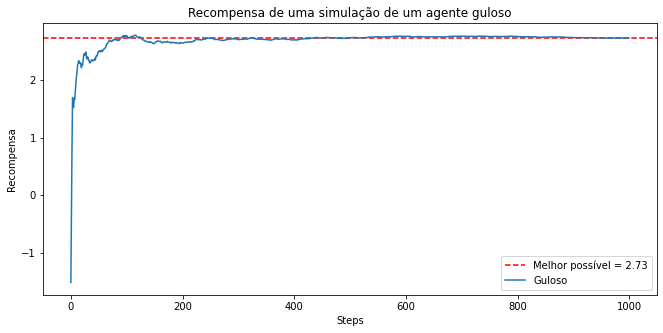

In [15]:
n_steps = 1_000

np.random.seed(3141)
agent = GreedyAgent(10)
env = Bandit(10)

score = [0]
means = []
max_score = np.max(env.bandits_expectations)

for step in range(n_steps):
    reward = env.gamble(agent.last_action)

    agent.last_action = agent.agent_step(reward)

    score.append(score[-1] + reward)
    means.append(score[-1]/(step+1))

plt.figure(figsize=(11,5))
plt.title("Recompensa de uma simulação de um agente guloso")
plt.axhline(y=max_score, ls="--", c="red", label=f"Melhor possível = {max_score:.2f}")
plt.plot(means, label="Guloso")
plt.xlabel("Steps")
plt.ylabel("Recompensa")
plt.legend(loc="best")
plt.show()

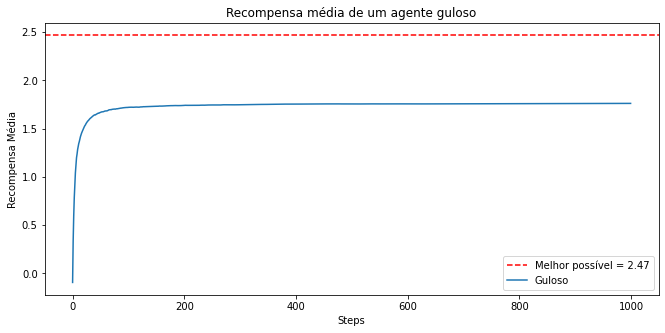

In [17]:
n_steps = 1_000
n_simulations = 200
total_means = []
max_means = 0


for simulation in range(n_simulations):

    agent = GreedyAgent(10)
    env = Bandit(10)


    score = [0]
    means = []

    max_means += np.max(env.bandits_expectations)

    for step in range(n_steps):
        reward = env.gamble(agent.last_action)

        agent.last_action = agent.agent_step(reward)

        score.append(score[-1] + reward)
        means.append(score[-1]/(step+1))

    total_means.append(means) # Aqui é feita uma lista na qual o 1º elemento é uma lista.
    # Depois é feita uma lista de listas, 1 lista por simulação.

max_mean= max_means/n_simulations

plt.figure(figsize=(11,5))
plt.title("Recompensa média de um agente guloso")
plt.axhline(y=max_mean, ls="--", c="red", label=f"Melhor possível = {max_mean:.2f}")
plt.plot(np.mean(total_means, axis=0), label="Guloso") 
plt.xlabel("Steps")
plt.ylabel("Recompensa Média")
plt.legend(loc="best")
plt.show()

In [19]:
class EpsilonGreedy():
    def __init__(self, k_arms, epsilon=0.1):  # 0.1 é o default
        self.epsilon = epsilon
        self.n_arms = np.zeros(k_arms)
        self.Q_values = np.zeros(k_arms)
        self.last_action = np.random.randint(0, k_arms)

    def agent_step(self, reward):
        """ (float) -> acao(int)
        Dá um step para o Agente atualizando os valores Q.
        Pega a recompensas do estado e retorna a ação escolhida.
        """ 

        self.n_arms[self.last_action] += 1
        current_Q = self.Q_values[self.last_action] + 1/self.n_arms[self.last_action] * (reward - self.Q_values[self.last_action])
        self.Q_values[self.last_action] = current_Q

        u = np.random.random() # número aleatório real entre 0 e 1

        if u < self.epsilon : # ou pq não pode "epsilon?""
            current_action = np.random.choice(range(9)) # ou np.random.randint(self.k_arms) ou só k_arms?
        else:
            current_action = argmax(self.Q_values)

        self.last_action = current_action

        return self.last_action

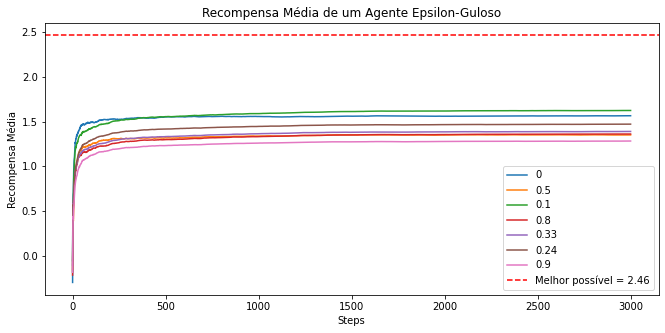

In [20]:
n_steps = 3_000
n_simulations = 20
total_means = []
max_means = []
max_score = np.max(env.bandits_expectations)

# coloque outros parâmetros para epsilon!
epsilons = [0, 0.5, 0.1, 0.8, 0.33, 0.24, 0.9]

plt.figure(figsize=(11,5))

# Fazer 20 simulações, com 3.000 steps para cada epsilon eps
for eps in epsilons: 
    max_mean = 0
    for runs in range(n_simulations):

        agent = EpsilonGreedy(10, eps) # inicialize o agente com um epsilon diferente

        env = Bandit(10) 

        score = [0]
        means = []

        max_mean += np.max(env.bandits_expectations)

        for step in range(n_steps):
            reward = env.gamble(agent.last_action) # Tome ação no ambiente

            agent.last_action = agent.agent_step(reward)


            score.append(score[-1] + reward)
            means.append(score[-1]/(step+1))
        total_means.append(means)

    max_means.append(max_mean/n_simulations)
    
    plt.plot(np.mean(total_means, axis=0), label=f"{eps}")

y = np.mean(max_means, 0) # o que é esse 0?
plt.axhline(y, ls="--", c="red", label=f"Melhor possível = {y:.2f}")
plt.legend(loc="best")
plt.title("Recompensa Média de um Agente Epsilon-Guloso")
plt.xlabel("Steps")
plt.ylabel("Recompensa Média")
plt.show()